In [1]:
%pip install matplotlib numpy
current_dir = %pwd

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
base_path = os.path.dirname(current_dir)

In [26]:
"""
Utility functions
"""

# --------------------------------------------------------------------------------------
# Get data from all participants and target distances
# Input: participants - list of participants
#        trial - trial name
#        target_dist - list of target distances
#        box - box name
#        base_path - base path
# Output: data_cm - dictionary of target distances and their corresponding data in cm
#         data_in - dictionary of target distances and their corresponding data in inches
# --------------------------------------------------------------------------------------
def get_data(participants, target_dist, trial, box, base_path):
    data_cm = {}
    data_in = {}
    for participant in participants:
        for dist in target_dist:
            data_path = os.path.join(base_path, f'data/2025.03.25_prelim/{participant}/{trial}/{dist}/{box}')
            for file in os.listdir(data_path):
                if file.endswith('.txt'):
                    # Load data
                    data = np.loadtxt(os.path.join(data_path, file), delimiter=',', skiprows=1)
                    
                    # Extract columns 1 and 2
                    min_dist_cm = data[:, 1]  
                    min_dist_in = data[:, 2]  
                    
                    # Append to target_dist_map
                    if dist in data_cm.keys():
                        data_cm[dist] = np.append(data_cm[dist], min_dist_cm)
                        data_in[dist] = np.append(data_in[dist], min_dist_in)
                    else:   
                        data_cm[dist] = min_dist_cm
                        data_in[dist] = min_dist_in
    return data_cm, data_in

# --------------------------------------------------------------------------------------
# Calculate mean and std of data points within z_score_threshold
# Return means, stds, and dists
# Input: target_dist_map - dictionary of target distances and their corresponding data
#        sigma_threshold  - 68%-1 95%-2 99.7%-3
# Output: means - list of means of data points within z_score_threshold
#         stds - list of stds of data points within z_score_threshold
#         dists - list of target distances
# --------------------------------------------------------------------------------------
def calc_error_metrics(target_dist_map, z_threshold=2):
    means = []
    stds = []
    dists = []
    for dist in target_dist_map.keys():
        z_scores = np.abs((target_dist_map[dist] - np.mean(target_dist_map[dist])) / np.std(target_dist_map[dist]))
        filtered_data = target_dist_map[dist][z_scores < z_threshold]
        means.append(np.mean(filtered_data))
        stds.append(np.std(filtered_data))
        dists.append(int(dist))
    
    metrics_map = {'dists': dists,    
                 'means': means, 
                 'stds': stds, 
                 'z_threshold': z_threshold}
                 
    return metrics_map

# --------------------------------------------------------------------------------------
# Plot mean errors
# --------------------------------------------------------------------------------------
def plot_mean_errors(data_list, labels=None, colors=None, 
                     title='Mean Error vs Target Distance', 
                     xlabel='Target Distance (cm)', 
                     ylabel='Mean Error ± 2σ (in)'):
    if labels is None:
        labels = [f'Dataset {i+1}' for i in range(len(data_list))]
    if colors is None:
        colors = plt.cm.tab10(np.linspace(0, 1, len(data_list)))
        
    fig = plt.figure(figsize=(10, 6))
    
    max_dist = 0
    for i, metrics_map in enumerate(data_list):
        dists = metrics_map['dists']
        means = metrics_map['means'] 
        stds = metrics_map['stds']
        
        # Plot scatter and line with labels for legend and error bars
        plt.errorbar(dists, means, yerr=stds, color=colors[i], marker='o', markersize=6,
                    capsize=5, capthick=1, elinewidth=1, linestyle='-', linewidth=2,
                    label=labels[i])
                    
        max_dist = max(max_dist, max(dists))
    
    # Style the plot
    plt.xlabel(xlabel, fontsize=12, fontweight='bold')
    plt.ylabel(ylabel, fontsize=12, fontweight='bold')
    plt.title(title, fontsize=14, fontweight='bold', pad=15)
    
    # Customize grid and spines
    plt.grid(True, linestyle='-', alpha=0.5)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Add light background color
    plt.gcf().patch.set_facecolor('white')
    
    # Set x-axis ticks every 100 cm
    plt.xticks(np.arange(0, max_dist+150, 100))
    
    # Add legend
    plt.legend(frameon=True)
    
    plt.tight_layout()
    return fig


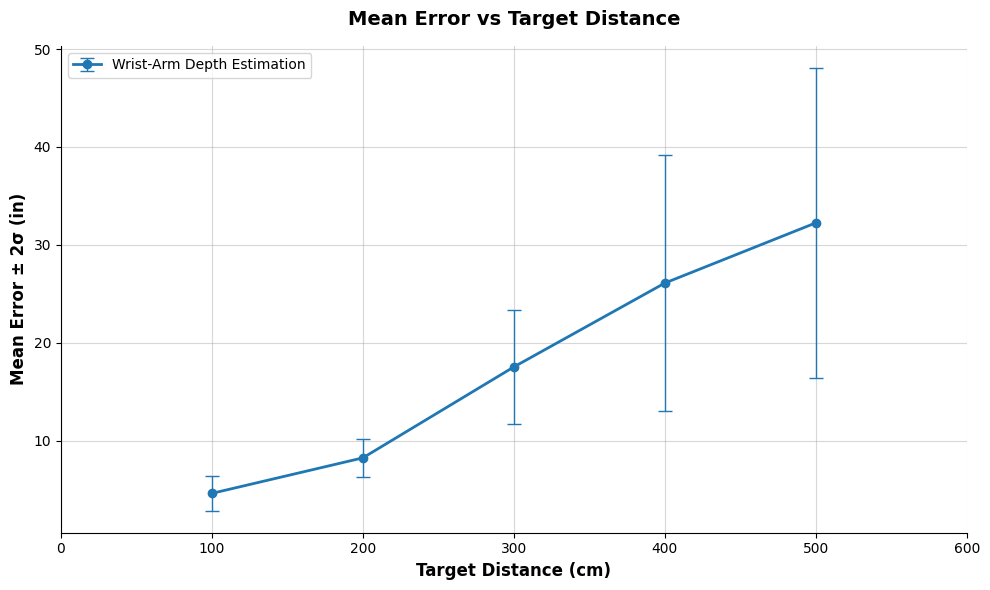

In [ ]:
"""
WRIST-ARM DEPTH ESTIMATION W. VISUAL FEEDBACK
"""

# Define parameters
participants = ['frank', 'asha', 'sanat']
target_dist = [100, 200, 300, 400, 500] 
trial = 'VIS_Kalibr_wrist_arm_estimation'
box = '080'

# Get data
kalibr_wrist_arm_data_cm, kalibr_wrist_arm_data_in = get_data(participants, target_dist, trial, box, base_path)

# Calculate error metrics
kalibr_wrist_arm_metrics = calc_error_metrics(kalibr_wrist_arm_data_in, z_threshold=2)

# Plot mean errors
# my_fig = plot_mean_errors(kalibr_wrist_arm_metrics['dists'], 
#                           kalibr_wrist_arm_metrics['means'], 
#                           kalibr_wrist_arm_metrics['stds'],
#                           label='Wrist-Arm Depth Estimation')
my_fig = plot_mean_errors([kalibr_wrist_arm_metrics], labels=['Wrist-Arm Depth Estimation'])


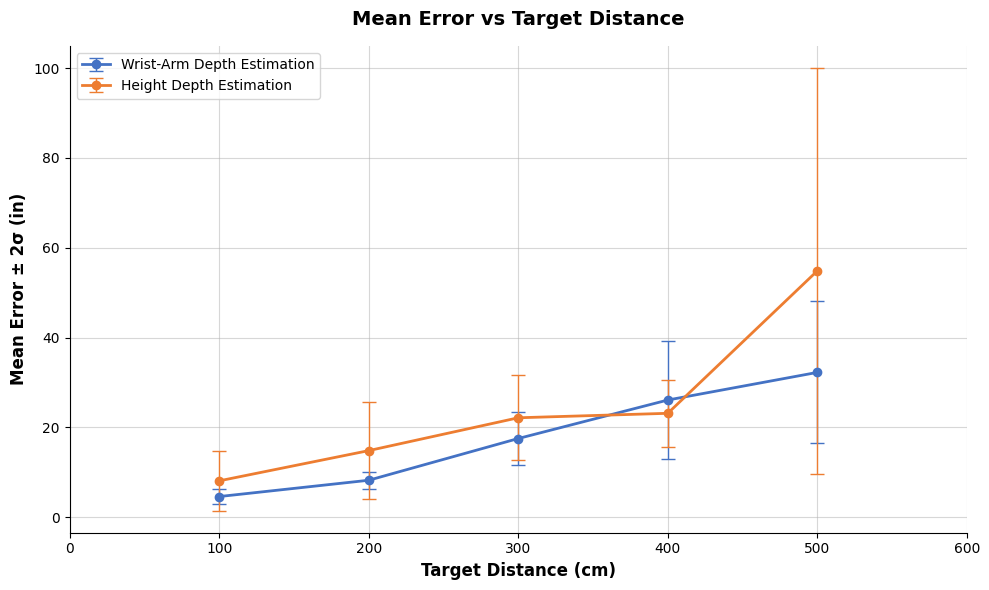

In [ ]:
"""
HEIGHT DEPTH ESTIMATION W. VISUAL FEEDBACK
"""

# Define parameters
participants = ['frank', 'asha', 'sanat']
target_dist = [100, 200, 300, 400, 500] 
trial = 'VIS_Kalibr_height_estimation'
box = '080'

# Get data
kalibr_height_data_cm, kalibr_height_data_in = get_data(participants, target_dist, trial, box, base_path)

# Calculate error metrics
kalibr_height_metrics = calc_error_metrics(kalibr_height_data_in, z_threshold=2)

# Plot mean errors
my_fig = plot_mean_errors([kalibr_wrist_arm_metrics, kalibr_height_metrics], 
                          labels=['Wrist-Arm Depth Estimation', 'Height Depth Estimation'],
                          colors=['#4472C4', '#ED7D31'])



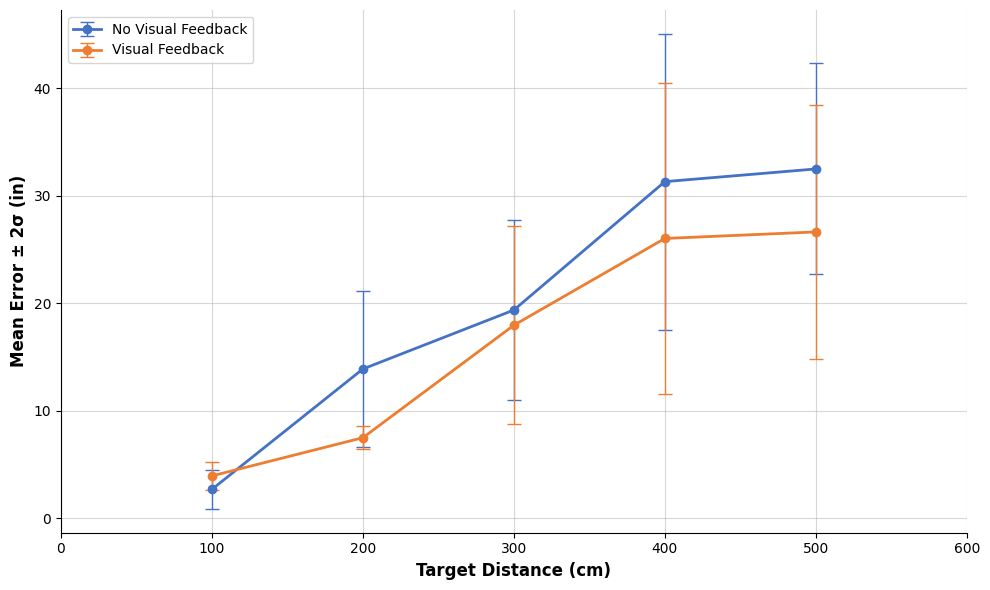

In [38]:
"""
VISUAL FEEDBACK vs NO VISUAL FEEDBACK
"""

# Define parameters
participants = ['frank', 'asha']
target_dist = [100, 200, 300, 400, 500]
sigma = 2
box = '080'

# Get data
NV_kalibr_wrist_arm_data_cm, NV_kalibr_wrist_arm_data_in = get_data(participants, target_dist, 'NO_VIS_Kalibr_wrist_arm_estimation', box, base_path)
V_kalibr_wrist_arm_data_cm, V_kalibr_wrist_arm_data_in = get_data(participants, target_dist, 'VIS_Kalibr_wrist_arm_estimation', box, base_path)

# Calculate error metrics
NV_kalibr_wrist_arm_metrics = calc_error_metrics(NV_kalibr_wrist_arm_data_in, z_threshold=sigma)
V_kalibr_wrist_arm_metrics = calc_error_metrics(V_kalibr_wrist_arm_data_in, z_threshold=sigma)

# Plot mean errors
fig3 = plot_mean_errors([NV_kalibr_wrist_arm_metrics, V_kalibr_wrist_arm_metrics], 
                          labels=['No Visual Feedback', 'Visual Feedback'],
                          colors=['#4472C4', '#ED7D31'],
                          title='')

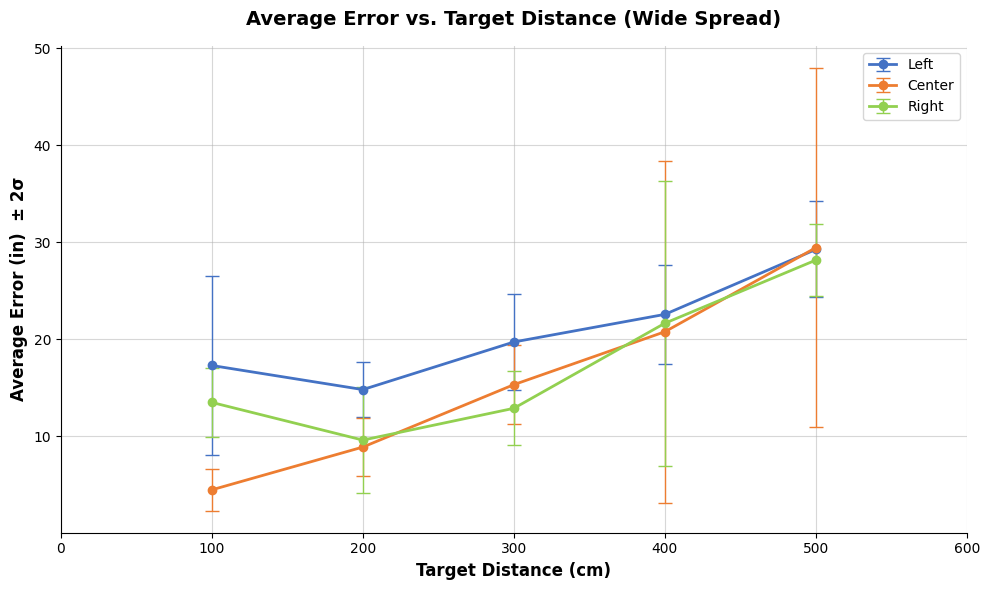

In [47]:
"""
LEFT, RIGHT, CENTER
"""

# Define parameters
participants = ['frank', 'sanat']
target_dist = [100, 200, 300, 400, 500]
sigma = 2
box = '080'

# Get data
center_data_cm, center_data_in = get_data(participants, target_dist, 'VIS_Kalibr_wrist_arm_estimation', box, base_path)
left_data_cm, left_data_in = get_data(participants, target_dist, 'VIS_Kalibr_write_arm_estimation_left_box', box, base_path)
right_data_cm, right_data_in = get_data(participants, target_dist, 'VIS_Kalibr_write_arm_estimation_right_box', box, base_path)

# Calculate error metrics
center_metrics = calc_error_metrics(center_data_in, z_threshold=sigma)
left_metrics = calc_error_metrics(left_data_in, z_threshold=sigma)
right_metrics = calc_error_metrics(right_data_in, z_threshold=sigma)

# Plot mean errors
fig3 = plot_mean_errors([left_metrics, center_metrics, right_metrics], 
                          labels=[ 'Left', 'Center', 'Right'],
                          colors=['#4472C4', '#ED7D31', '#92D050'],
                          title='Average Error vs. Target Distance (Wide Spread)',
                          ylabel='Average Error (in)  ± 2σ')

plt.savefig('left_center_right_comparison.svg', format='svg', bbox_inches='tight')